In [1]:
import importlib

def install_if_not_installed(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}
        print(f"{package} has been successfully installed.")

# Check and install ucimlrepo if not installed
install_if_not_installed("ucimlrepo")

# Import and use ucimlrepo
import ucimlrepo

ucimlrepo is already installed.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

import warnings     # filter warning messages
warnings.simplefilter(action="ignore")

In [3]:
# Load data into DataFrame

spambase = fetch_ucirepo(id=94)

X = pd.DataFrame(spambase.data.features)
y = pd.DataFrame(spambase.data.targets)

y.value_counts()

Class
0        2788
1        1813
Name: count, dtype: int64

In [4]:
# Display first few rows
df = pd.concat([X, y], axis=1)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Train decision tree without pruning
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy')
dt_classifier_entropy.fit(X_train, y_train)

# Make predictions
train_predictions = dt_classifier_entropy.predict(X_train)
test_predictions = dt_classifier_entropy.predict(X_test)

In [6]:
# Compute evaluation metrics for entropy index criterion
train_accuracy_entropy = accuracy_score(y_train, train_predictions)
test_accuracy_entropy = accuracy_score(y_test, test_predictions)

train_f1_score_entropy = f1_score(y_train, train_predictions)
test_f1_score_entropy = f1_score(y_test, test_predictions)

train_auc_entropy = roc_auc_score(y_train, train_predictions)
test_auc_entropy = roc_auc_score(y_test, test_predictions)

train_error_rate_entropy = 1 - train_accuracy_entropy
test_error_rate_entropy = 1 - test_accuracy_entropy

# Report metrics for entropy index criterion
print("Entropy Index Criterion\n")
print(f"Train Accuracy: {train_accuracy_entropy:.5f}")
print(f"Test Accuracy: {test_accuracy_entropy:.5f}\n")
print(f"Train F1: {train_f1_score_entropy:.5f}")
print(f"Test F1: {test_f1_score_entropy:.5f}\n")
print(f"Train AUC: {train_auc_entropy:.5f}")
print(f"Test AUC: {test_auc_entropy:.5f}\n")
print(f"Train Error Rate: {train_error_rate_entropy:.5f}")
print(f"Test Error Rate: {test_error_rate_entropy:.5f}")

Entropy Index Criterion

Train Accuracy: 1.00000
Test Accuracy: 0.91659

Train F1: 1.00000
Test F1: 0.89542

Train AUC: 1.00000
Test AUC: 0.91530

Train Error Rate: 0.00000
Test Error Rate: 0.08341


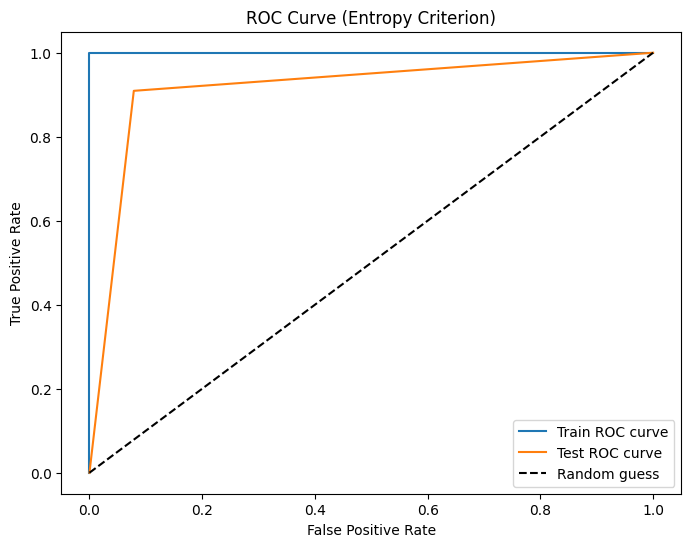

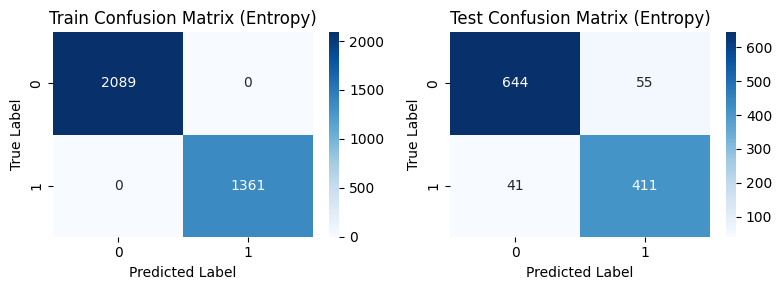

In [7]:
from sklearn.metrics import confusion_matrix

# Compute ROC curve
train_fpr, train_tpr, _ = roc_curve(y_train, train_predictions)
test_fpr, test_tpr, _ = roc_curve(y_test, test_predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, label='Test ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Entropy Criterion)')
plt.legend()
plt.show()

# Compute confusion matrix
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Train Confusion Matrix (Entropy)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Test Confusion Matrix (Entropy)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [8]:
# Get the maximum depth of the tree
tree_depth = dt_classifier_entropy.tree_.max_depth

print("Maximum depth of the decision tree:", tree_depth)

Maximum depth of the decision tree: 26


In [9]:
# Train decision tree with Gini index criterion
dt_classifier_gini = DecisionTreeClassifier(criterion='gini')
dt_classifier_gini.fit(X_train, y_train)

# Make predictions
train_predictions_gini = dt_classifier_gini.predict(X_train)
test_predictions_gini = dt_classifier_gini.predict(X_test)

# Compute evaluation metrics for Gini index criterion
train_accuracy_gini = accuracy_score(y_train, train_predictions_gini)
test_accuracy_gini = accuracy_score(y_test, test_predictions_gini)

train_f1_score_gini = f1_score(y_train, train_predictions_gini)
test_f1_score_gini = f1_score(y_test, test_predictions_gini)

train_auc_gini = roc_auc_score(y_train, train_predictions_gini)
test_auc_gini = roc_auc_score(y_test, test_predictions_gini)

train_error_rate_gini = 1 - train_accuracy_gini
test_error_rate_gini = 1 - test_accuracy_gini

# Report metrics for Gini index criterion
print("Gini Index Criterion\n")
print(f"Train Accuracy: {train_accuracy_gini:.5f}")
print(f"Test Accuracy: {test_accuracy_gini:.5f}\n")
print(f"Train F1 Score: {train_f1_score_gini:.5f}")
print(f"Test F1 Score: {test_f1_score_gini:.5f}\n")
print(f"Train AUC: {train_auc_gini:.5f}")
print(f"Test AUC: {test_auc_gini:.5f}\n")
print(f"Train Error Rate: {train_error_rate_gini:.5f}")
print(f"Test Error Rate: {test_error_rate_gini:.5f}")

Gini Index Criterion

Train Accuracy: 1.00000
Test Accuracy: 0.90617

Train F1 Score: 1.00000
Test F1 Score: 0.88132

Train AUC: 1.00000
Test AUC: 0.90281

Train Error Rate: 0.00000
Test Error Rate: 0.09383


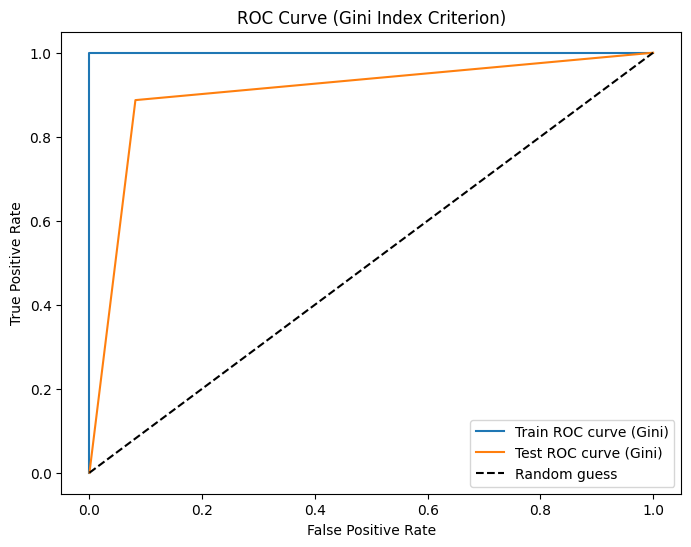

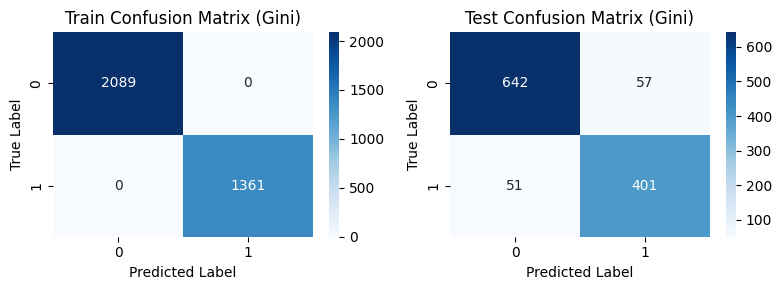

In [10]:
# Compute ROC curve for Gini index criterion
train_fpr_gini, train_tpr_gini, _ = roc_curve(y_train, train_predictions_gini)
test_fpr_gini, test_tpr_gini, _ = roc_curve(y_test, test_predictions_gini)

# Plot ROC curve for Gini index criterion
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_gini, train_tpr_gini, label='Train ROC curve (Gini)')
plt.plot(test_fpr_gini, test_tpr_gini, label='Test ROC curve (Gini)')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gini Index Criterion)')
plt.legend()
plt.show()

# Compute confusion matrix for Gini index criterion
train_conf_matrix_gini = confusion_matrix(y_train, train_predictions_gini)
test_conf_matrix_gini = confusion_matrix(y_test, test_predictions_gini)

# Plot confusion matrix as heatmap for Gini index criterion
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix_gini, annot=True, cmap='Blues', fmt='d')
plt.title('Train Confusion Matrix (Gini)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix_gini, annot=True, cmap='Blues', fmt='d')
plt.title('Test Confusion Matrix (Gini)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

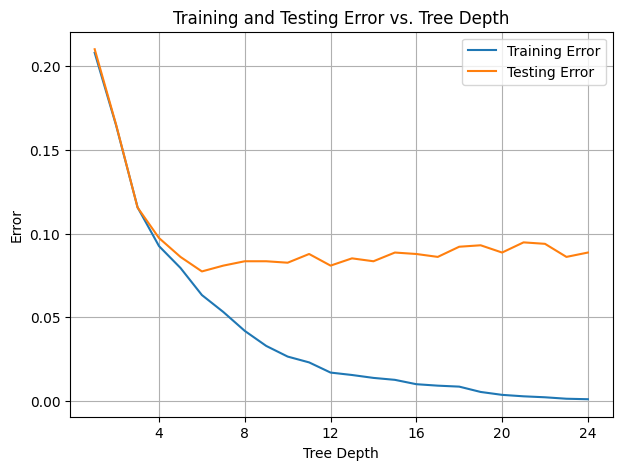

In [11]:
# Pre-pruning

# Define maximum depths to evaluate
max_depths = range(1, 25)

# Initialize lists to store errors
train_errors = []
test_errors = []

# Train decision trees with different maximum depths
for depth in max_depths:
    # Train decision tree with current maximum depth
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=1234)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on training and testing sets
    train_predictions = dt_classifier.predict(X_train)
    test_predictions = dt_classifier.predict(X_test)

    # Compute accuracy scores
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Compute errors
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot errors as a function of tree depth
plt.figure(figsize=(7, 5))
plt.plot(max_depths, train_errors, label='Training Error')
plt.plot(max_depths, test_errors, label='Testing Error')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Training and Testing Error vs. Tree Depth')
plt.legend()
plt.grid(True)

plt.xticks(np.arange(4, max(max_depths)+1, 4))

plt.show()

In [12]:
# Train decision tree with max_depth = 6
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=1234)
dt_classifier.fit(X_train, y_train)

# Make predictions
train_predictions = dt_classifier.predict(X_train)
test_predictions = dt_classifier.predict(X_test)

# Compute evaluation metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_f1_score = f1_score(y_train, train_predictions)
test_f1_score = f1_score(y_test, test_predictions)

train_auc = roc_auc_score(y_train, train_predictions)
test_auc = roc_auc_score(y_test, test_predictions)

train_error_rate = 1 - train_accuracy
test_error_rate = 1 - test_accuracy

# Report metrics
print(f"Train Accuracy: {train_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}\n")
print(f"Train F1 Score: {train_f1_score:.5f}")
print(f"Test F1 Score: {test_f1_score:.5f}\n")
print(f"Train AUC: {train_auc:.5f}")
print(f"Test AUC: {test_auc:.5f}\n")
print(f"Train Error Rate: {train_error_rate:.5f}")
print(f"Test Error Rate: {test_error_rate:.5f}")

Train Accuracy: 0.93681
Test Accuracy: 0.92268

Train F1 Score: 0.91817
Test F1 Score: 0.89966

Train AUC: 0.93015
Test AUC: 0.91562

Train Error Rate: 0.06319
Test Error Rate: 0.07732


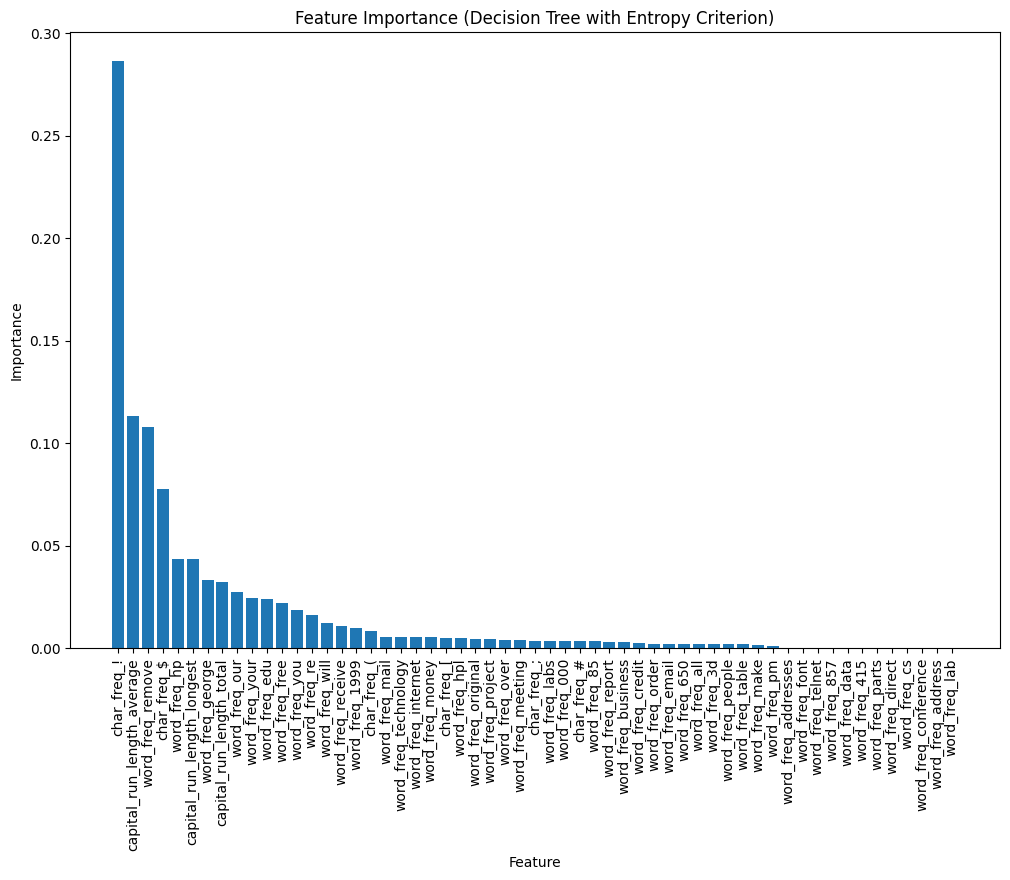

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Train a decision tree classifier with entropy criterion
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy')
dt_classifier_entropy.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier_entropy.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Decision Tree with Entropy Criterion)')
plt.show()